In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import glob
import random
import time
import statistics

import preprocessor
import configuration
import viz

preproc = preprocessor.PreProcessor()
config = configuration.Configuration()
vizualizer = viz.Vizualizer()

In [9]:
def infer(ax, model, image_file):
    img = cv.imread(image_file, 0)
    start = time.process_time()
    edges = cv.Canny(img, 100, 200)
    time_taken = time.process_time() - start
    
    ax.imshow(edges, cmap = 'gray')
    # ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return time_taken
    

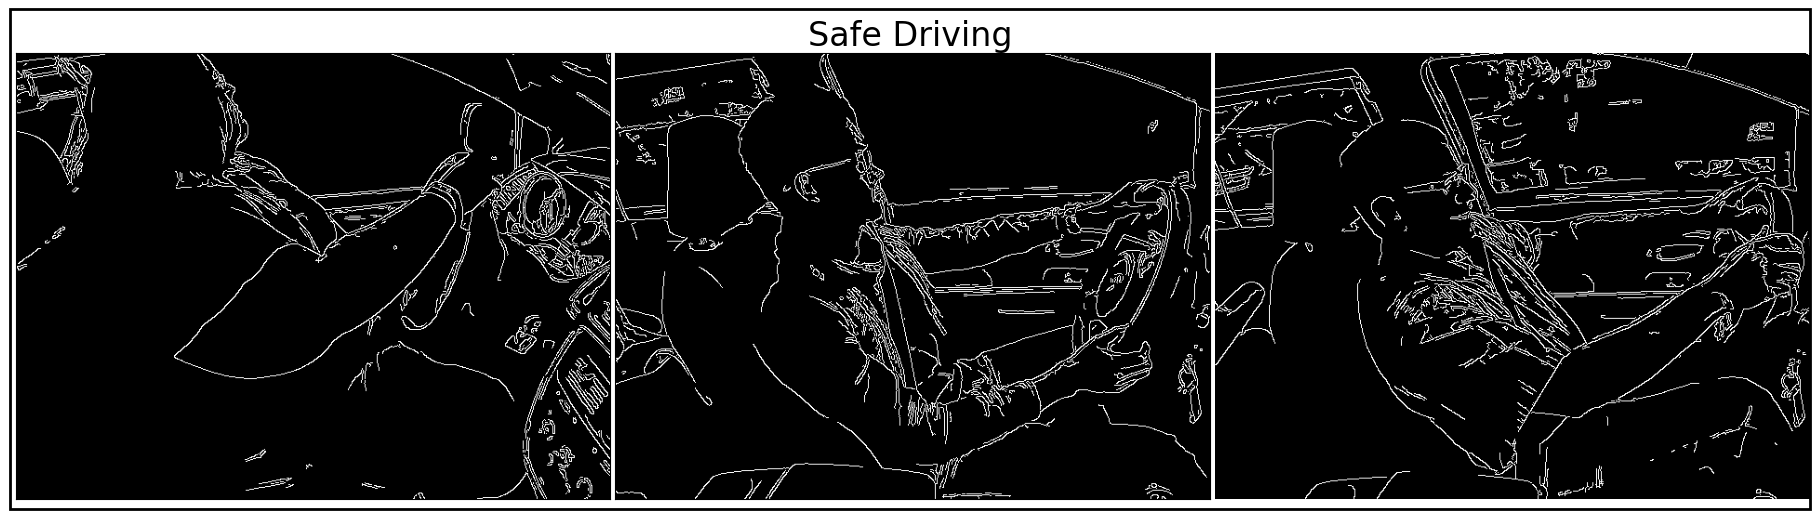

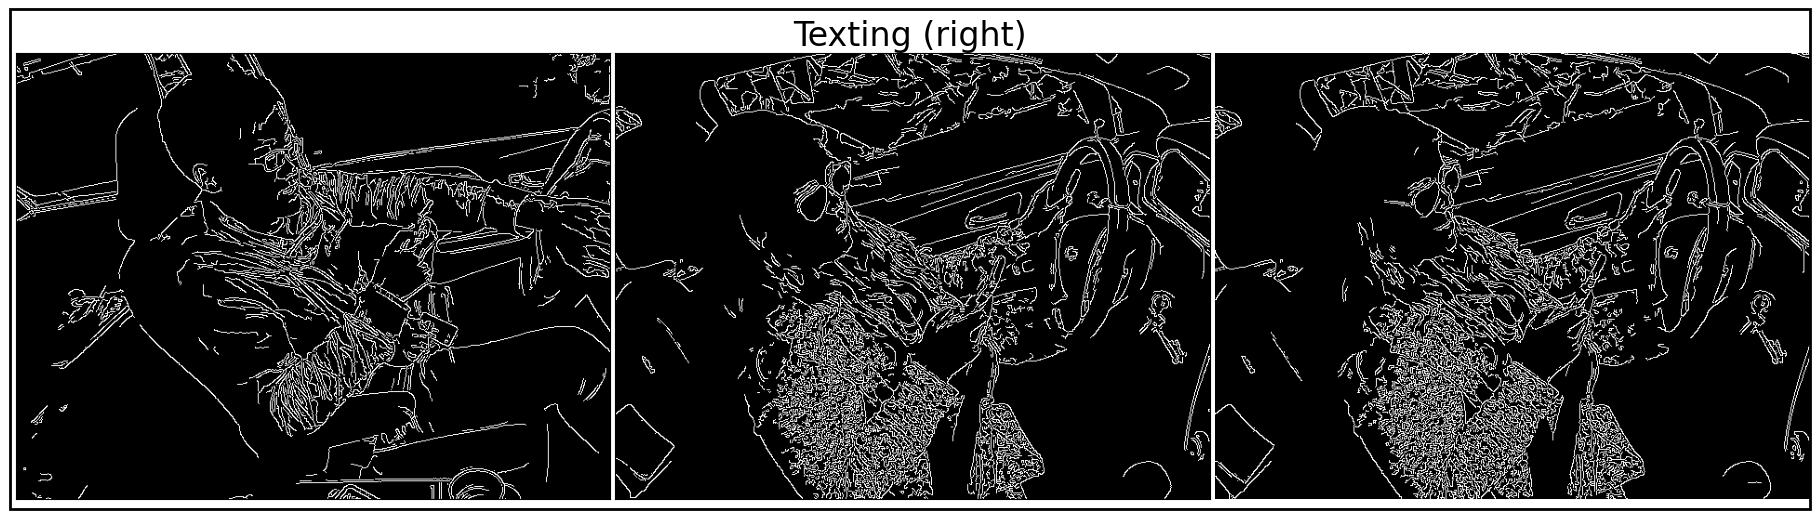

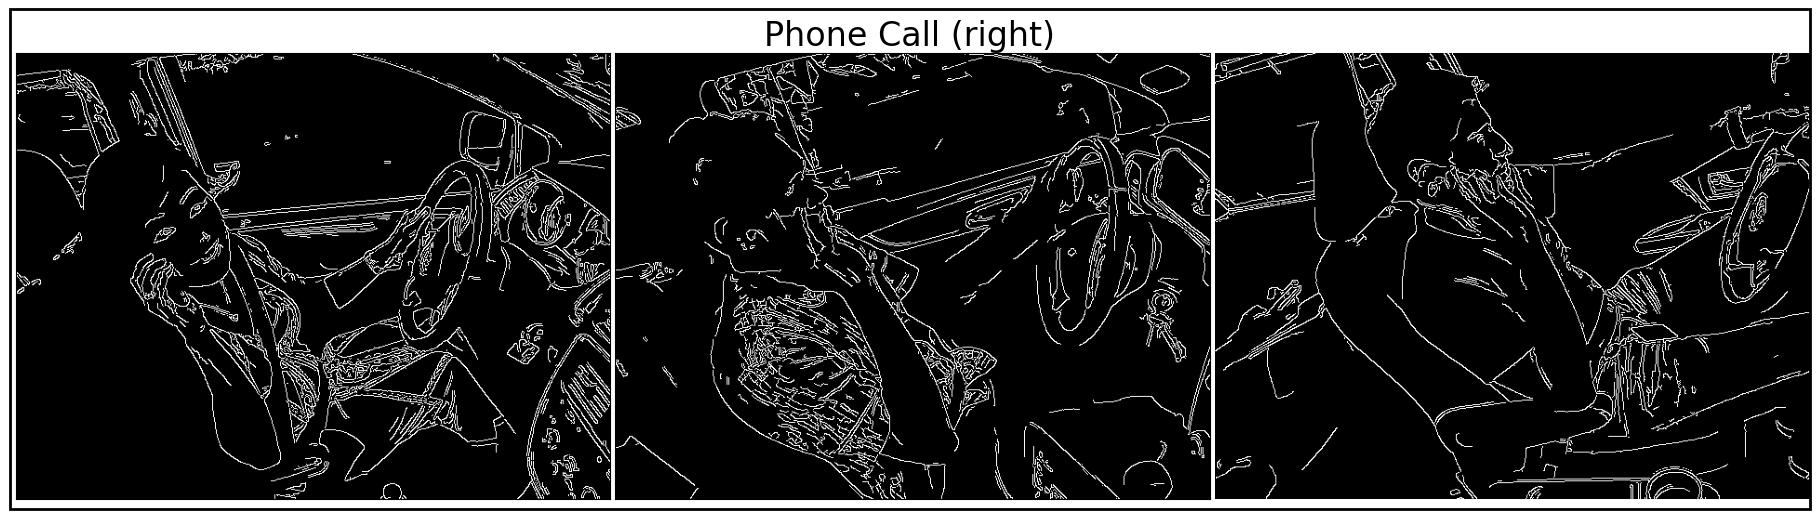

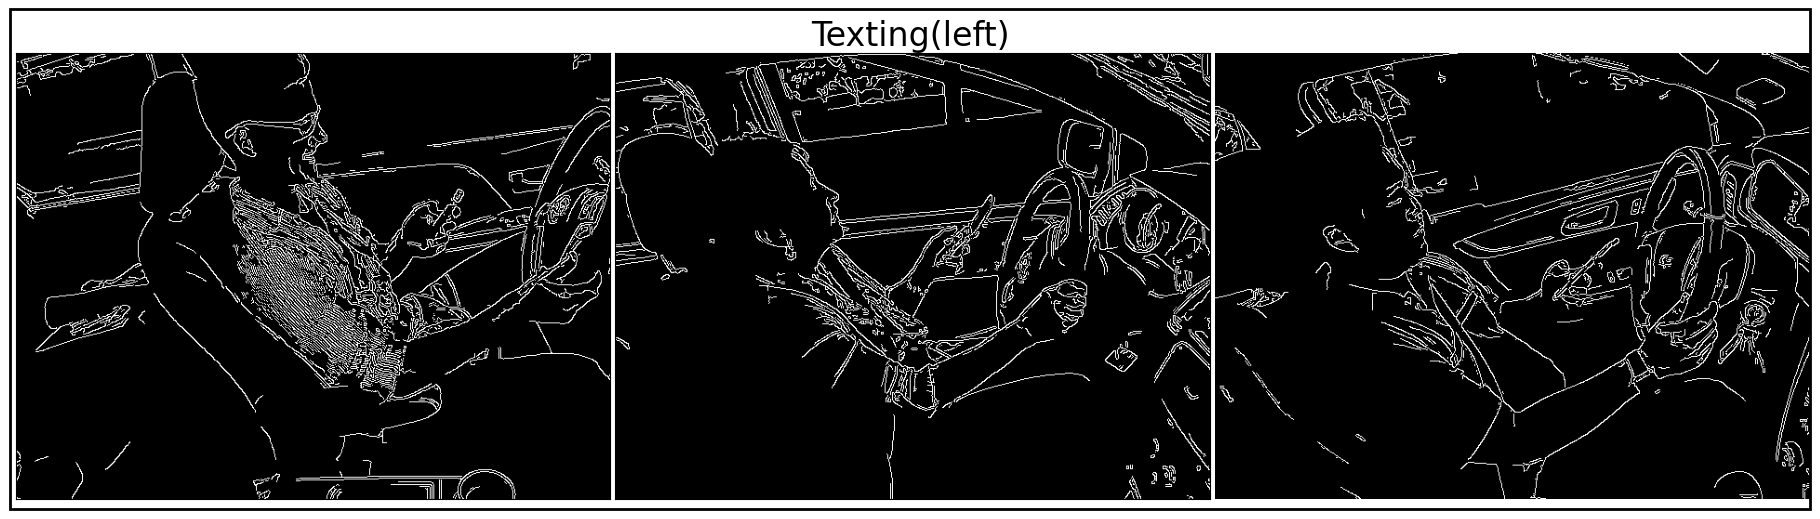

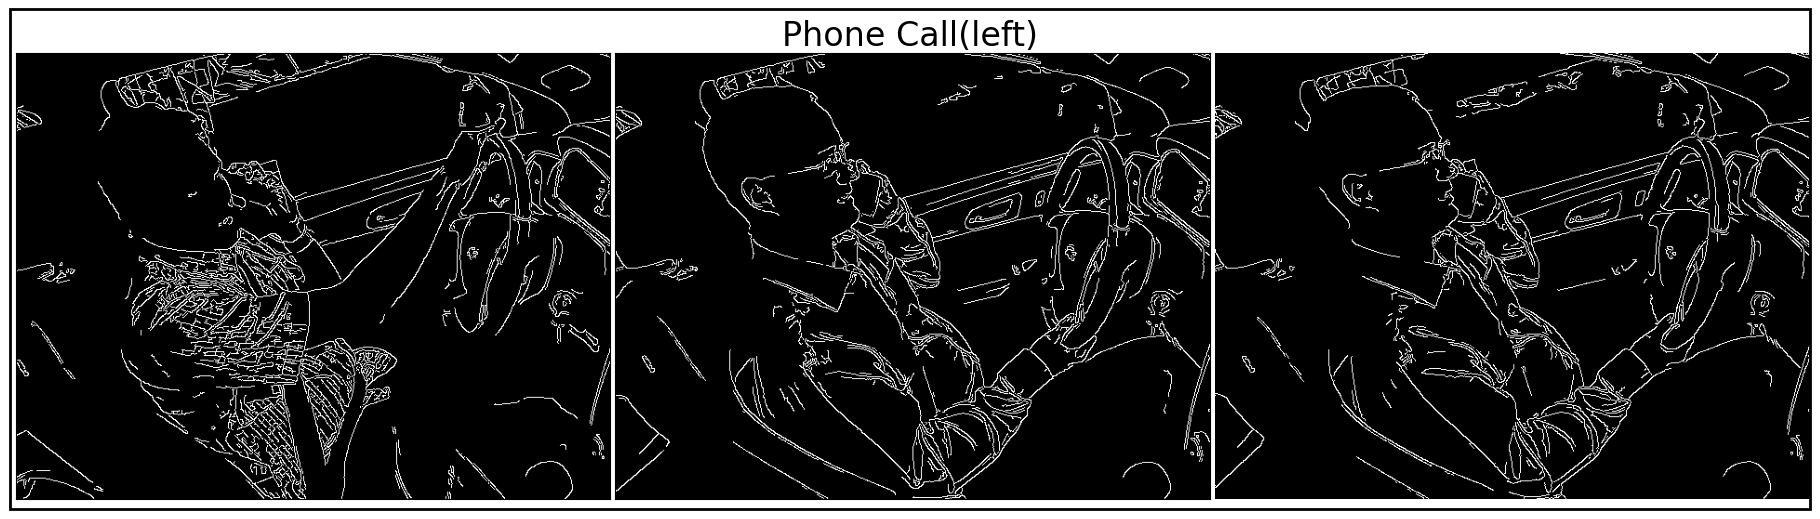

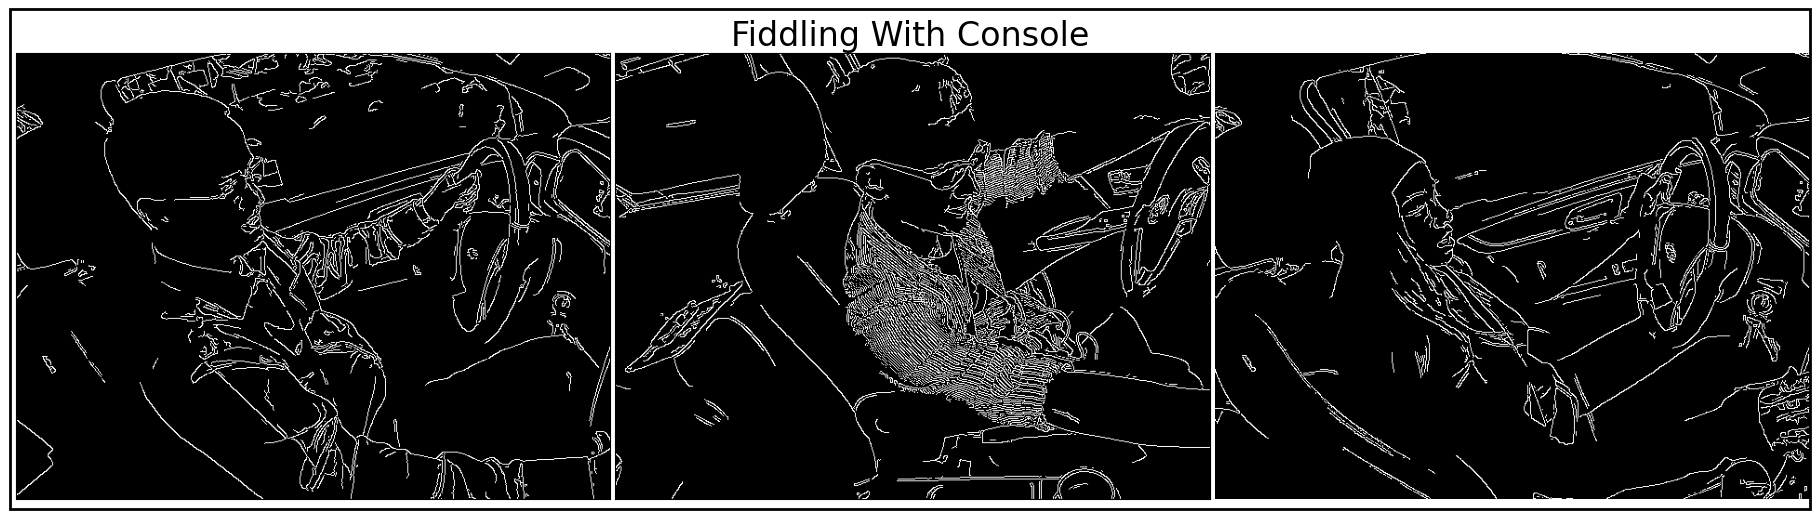

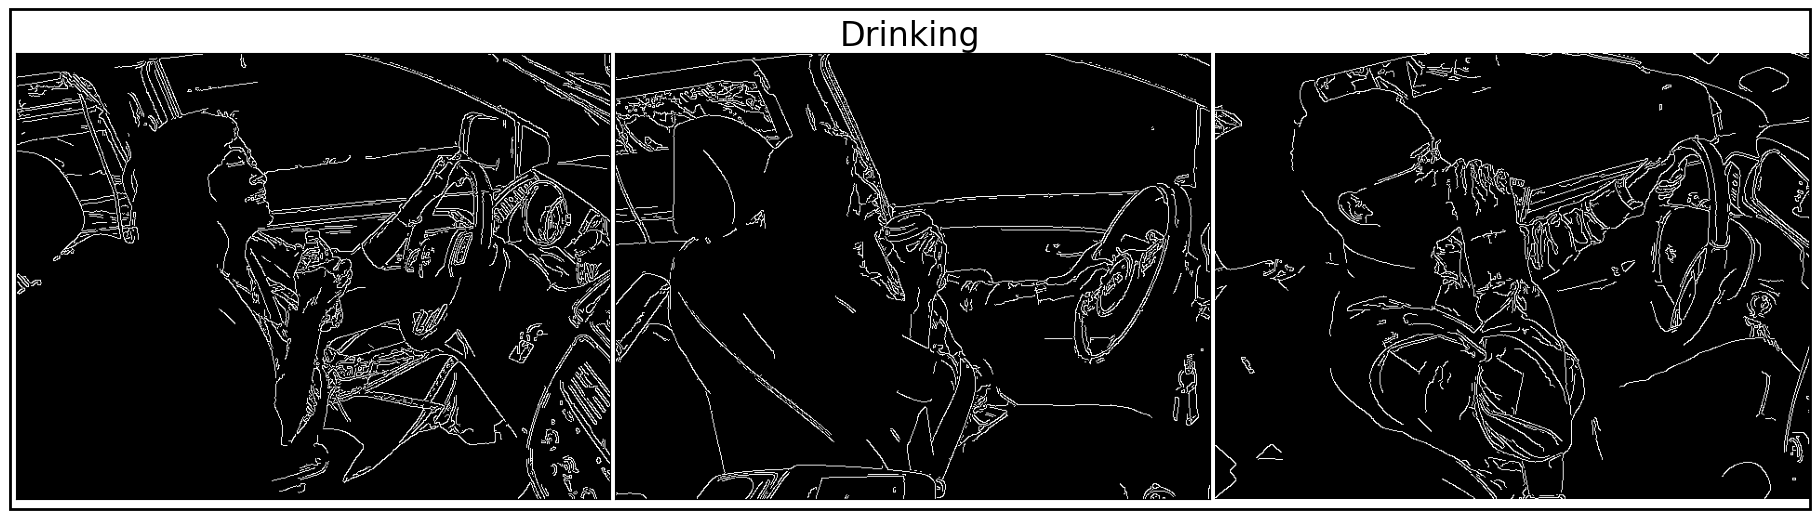

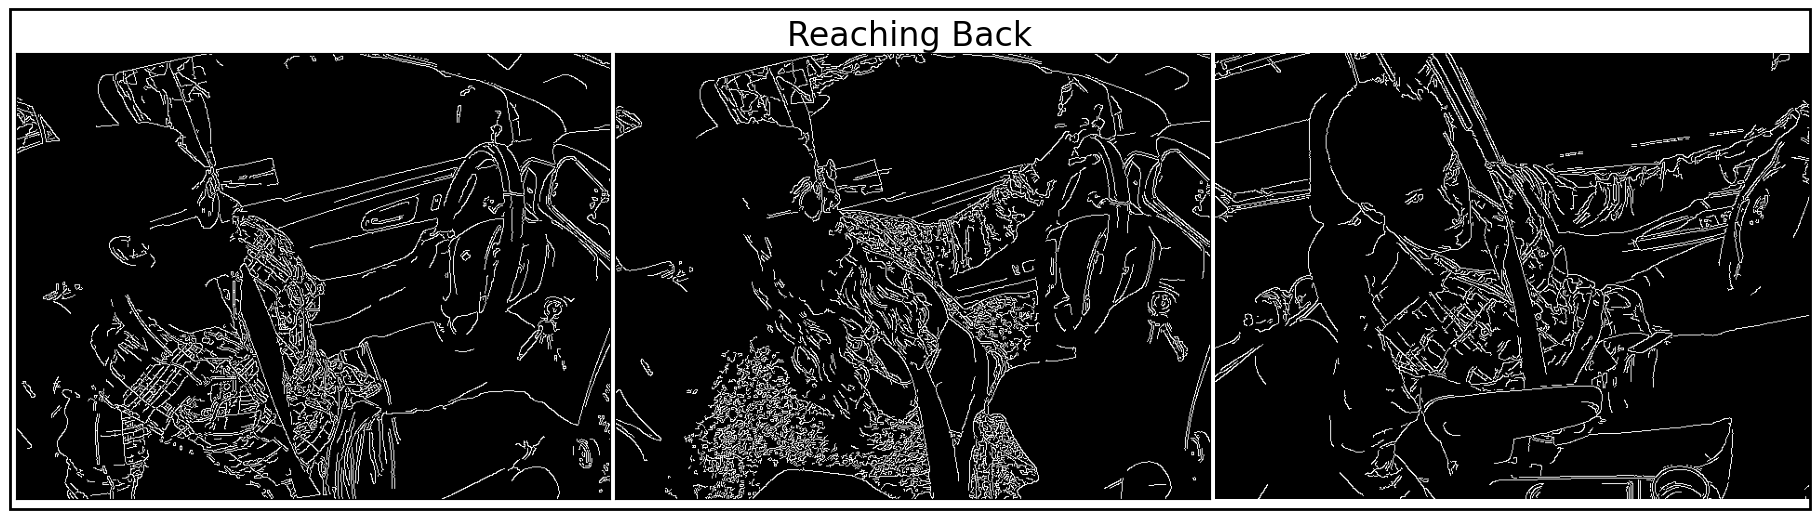

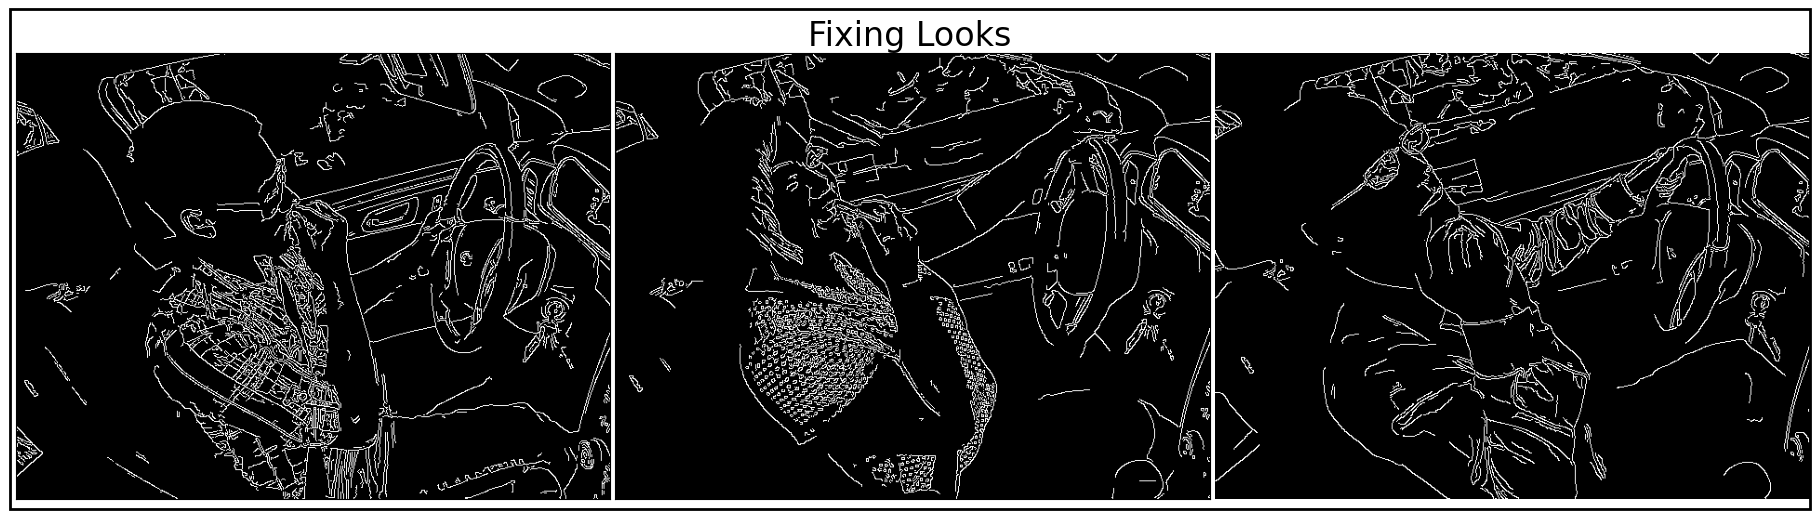

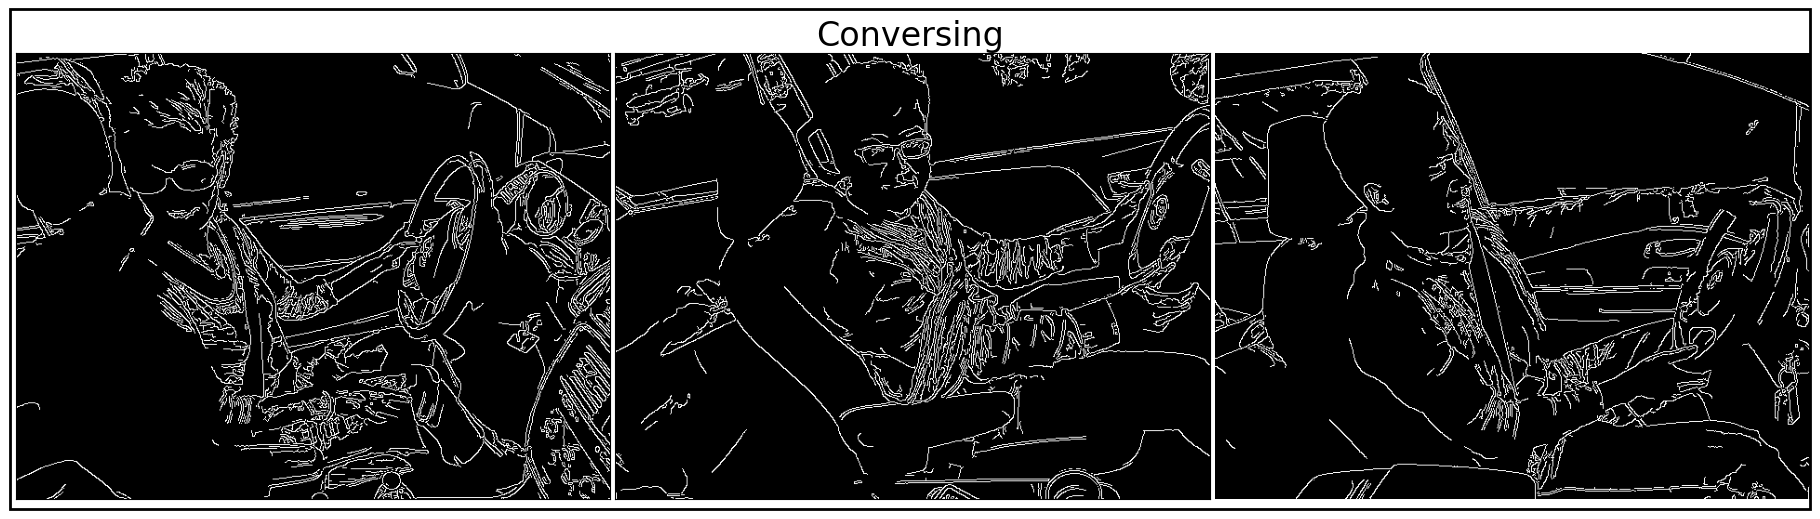

Average time for inference:0.004987099999995811 seconds
Anticipated preprocessing time for training dataset of 22,000:1.8286033333317975 mins


In [35]:
times = []
num_images=3
cols=3
plt_width=18
plt_height=5
for cur_class in range(len(config.class_dict)):
    new_times = vizualizer.infer_and_plot(None, infer, config.class_dict[cur_class], 
                                          f'{config.IMAGES_BASE}/c{cur_class}', 
                                          num_images=num_images, cols=cols, 
                                          plt_width=plt_width, plt_height=plt_height,
                                         title_color='black')
    times = [*times, *new_times]

print(f'Average time for inference:{statistics.mean(times)} seconds')
print(f'Anticipated preprocessing time for training dataset of 22,000:{22000 * statistics.mean(times) / 60} mins')
